In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

<h1>Overview of the data</h1>

In [2]:
data = pd.read_csv("Training Dataset for Task 3-20220502/task_3_training_5bdf9a9ed30b9a66_749fa46_generic.csv")
data

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,gems_nostalgia_binary,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Low-level Audio Features</h3>

In [3]:
data.filter(regex='essentia')

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,essentia_spectral_complexity_stdev,essentia_spectral_rolloff_mean,essentia_spectral_rolloff_stdev,essentia_strong_peak_mean,essentia_strong_peak_stdev
0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,1290.972900,936.912476,30.490740,2.349135,470.640045,1207.823608,1865.832520,1891.272705
1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,1133.526733,286.292847,28.111111,2.491034,629.848083,110.834175,11119.455078,7483.725586
2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,1050.947632,181.327225,28.354166,2.456479,642.310303,73.311058,12910.441406,8518.729492
3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,1076.780151,251.776215,29.354166,2.680005,607.117310,144.477844,9481.676758,9443.319336
4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,1008.112183,196.336700,29.375000,2.327000,534.941101,140.277069,10990.607422,8683.046875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,866.423889,133.063477,29.842592,2.253237,557.669861,118.683922,9583.834961,8391.625977
2278,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,828.768005,234.908127,30.296297,2.417182,450.901520,111.266678,1573.880493,1625.528564
2279,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,841.285645,226.538666,29.761574,2.482551,436.645477,110.298874,1297.203003,1514.652710
2280,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,716.426025,181.553772,29.881945,2.332827,464.358948,95.393364,3449.008789,2222.799316


In [4]:
data.filter(regex='librosa')

,librosa_bpm,librosa_chroma_mean_0,librosa_chroma_std_0,librosa_chroma_pct_10_0,librosa_chroma_pct_50_0,librosa_chroma_pct_90_0,librosa_chroma_mean_1,librosa_chroma_std_1,librosa_chroma_pct_10_1,librosa_chroma_pct_50_1,...,librosa_mfcc_mean_10,librosa_mfcc_std_10,librosa_mfcc_pct_10,librosa_mfcc_pct_50_10,librosa_mfcc_pct_90_10,librosa_mfcc_mean_11,librosa_mfcc_std_11,librosa_mfcc_pct_10_11,librosa_mfcc_pct_50_11,librosa_mfcc_pct_90_11
0,258.398438,0.373053,0.225611,0.135992,0.306941,0.703219,0.496350,0.220451,0.190233,0.531737,...,-2.489361,5.159132,-9.105977,-2.555340,3.976348,-1.905400,4.818770,-7.804691,-2.013212,4.252598
1,224.694293,0.091861,0.103458,0.013954,0.046071,0.270376,0.290538,0.240936,0.025029,0.324773,...,-3.137916,5.527211,-10.413605,-2.766848,3.652313,-4.067523,5.830081,-11.670424,-3.595830,3.299112
2,215.332031,0.161526,0.156989,0.013687,0.097885,0.370713,0.405277,0.319424,0.034594,0.326936,...,-4.036878,5.383811,-10.791273,-3.892330,2.779138,-5.481335,5.246166,-12.275232,-5.342162,0.955623
3,117.453835,0.152805,0.117782,0.022889,0.127496,0.322117,0.359905,0.255683,0.021070,0.407567,...,-3.695331,5.778541,-11.451571,-3.310619,3.459964,-3.274777,7.116310,-11.206470,-4.524760,7.043891
4,246.093750,0.202821,0.190843,0.016961,0.141174,0.459136,0.457662,0.320764,0.044929,0.410079,...,-5.760437,5.709575,-13.446388,-5.435995,1.234058,-6.179785,6.308616,-15.086003,-5.660230,1.892022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,246.093750,0.256839,0.266703,0.044726,0.144942,0.700913,0.260586,0.184603,0.058368,0.216271,...,-10.414947,4.865432,-16.887890,-10.350103,-3.848135,-8.786631,4.681174,-14.574200,-8.600704,-3.192562
2278,246.093750,0.660066,0.284973,0.280775,0.652290,1.000000,0.503727,0.256417,0.168147,0.486723,...,-5.602749,5.236038,-12.136916,-5.580261,1.215536,-6.720737,5.024703,-12.804048,-6.603259,-0.765713
2279,191.406250,0.317021,0.262035,0.049673,0.241737,0.699241,0.468953,0.327868,0.107321,0.378984,...,-3.349715,4.957078,-9.885340,-3.188201,3.309269,-2.862301,5.357865,-9.897942,-2.760796,4.268817
2280,258.398438,0.270779,0.168223,0.100047,0.227485,0.449106,0.474469,0.333709,0.100494,0.391627,...,-6.054935,5.303769,-13.109940,-6.485728,0.923183,-6.751603,5.022251,-13.537580,-6.450807,-0.887911


In [5]:
data.filter(regex='mirtoolbox')

,mirtoolbox_brightness,mirtoolbox_crescendo,mirtoolbox_dynamics_mean,mirtoolbox_dynamics_std,mirtoolbox_dynamics_pct_10,mirtoolbox_dynamics_pct_50,mirtoolbox_dynamics_pct_90,mirtoolbox_hcdf_mean,mirtoolbox_hcdf_std,mirtoolbox_hcdf_pct_10,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,0.138312,0.013090,-76.251059,10.140531,-75.723963,-75.324915,-75.279211,0.203396,0.106959,0.077880,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,0.140055,0.085301,-61.443286,11.372958,-60.983283,-60.904897,-58.931076,0.295592,0.144883,0.113479,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,0.131134,0.004834,-55.204632,11.863459,-54.543265,-54.166873,-54.111344,0.289712,0.155723,0.126654,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,0.174673,0.159619,-53.715012,12.132573,-53.342435,-51.887136,-51.829872,0.257898,0.193532,0.086685,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,0.155665,0.000000,-58.496605,11.601717,-58.030885,-57.142992,-57.073355,0.311727,0.159539,0.115372,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0.152974,0.000000,-53.289369,12.019268,-52.436725,-52.279647,-52.222382,0.406196,0.166870,0.214162,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
2278,0.101128,0.242002,-74.693800,11.595382,-85.024776,-70.846186,-70.790657,0.284063,0.206826,0.092215,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
2279,0.126772,0.000000,-66.063562,10.972754,-65.288956,-65.139073,-65.088583,0.334015,0.252126,0.052282,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
2280,0.117293,0.056483,-69.548906,10.765416,-70.558296,-67.711884,-67.656355,0.347355,0.161641,0.178608,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


<h3>Mid-level Perceptual Features</h3>

In [6]:
data.filter(regex='midlevel')

,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness
0,0.287032,-0.284226,-0.271440,-0.073550,-0.413004,0.334240,0.152436
1,0.317098,-0.301676,-0.253851,-0.061130,-0.421232,0.336180,0.111838
2,0.318557,-0.354457,-0.299241,-0.086770,-0.444719,0.335987,-0.015267
3,0.304550,-0.427759,-0.298822,-0.153465,-0.404922,0.274274,-0.045132
4,0.231792,-0.345944,-0.231145,-0.170548,-0.341099,0.246358,-0.128247
...,...,...,...,...,...,...,...
2277,0.038507,-0.158969,-0.225481,-0.175239,-0.232897,0.216191,-0.113735
2278,0.018053,-0.192053,-0.233269,-0.240172,-0.242610,0.185704,-0.059602
2279,-0.017201,-0.276259,-0.214809,-0.273117,-0.191629,0.132857,0.054475
2280,-0.029910,-0.258118,-0.203812,-0.262117,-0.188480,0.144021,0.079083


<h3>High-level Emotion Features</h3>
<p>This features correspond to the aggregated values of your annotations of the GEMS and GEMMES factors. These features describe high-level concepts and metaphors that describe musical expression and emotion. Remember that these features will not be provided for the next phase and you have to predict them from the low- and mid-level features if you think that they are relevant for predicting the emotion classes.

These features should not be used as inputs for the classifiers for the bonus question! 😉</p>

In [7]:
data.filter(regex='gems')

,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gems_wonder_binary,gems_transcendence_binary,gems_tenderness_binary,gems_nostalgia_binary,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary
0,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2278,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.filter(regex='gemmes')

,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary
0,2.090909,1.909091,2.454545,3.363636,0.0,0.0,0.0,1.0
1,2.090909,1.909091,2.454545,3.363636,0.0,0.0,0.0,1.0
2,2.090909,1.909091,2.454545,3.363636,0.0,0.0,0.0,1.0
3,2.090909,1.909091,2.454545,3.363636,0.0,0.0,0.0,1.0
4,2.090909,1.909091,2.454545,3.363636,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2277,2.272727,2.727273,2.545455,2.090909,0.0,0.0,0.0,0.0
2278,2.272727,2.727273,2.545455,2.090909,0.0,0.0,0.0,0.0
2279,2.272727,2.727273,2.545455,2.090909,0.0,0.0,0.0,0.0
2280,2.272727,2.727273,2.545455,2.090909,0.0,0.0,0.0,0.0


<h1>Remove high-level features</h1>

In [9]:
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
data_filtered

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90,quadrant,valence,arousal
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025,3.0,-0.363636,2.818182
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610,3.0,-0.363636,2.818182
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690,3.0,-0.363636,2.818182
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971,3.0,-0.363636,2.818182
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731,3.0,-0.363636,2.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522,1.0,0.545455,3.090909
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763,1.0,0.545455,3.090909
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254,1.0,0.545455,3.090909
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997,1.0,0.545455,3.090909


In [10]:
correlation = data.corr()
correlation

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,gems_nostalgia_binary,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary
pianist_id,1.000000,0.001988,-0.017890,0.068393,-0.007745,0.025530,-0.142609,-0.012397,0.038523,-0.029373,...,-0.125949,-0.029071,-0.015426,-0.037035,-0.057701,-0.122222,-0.131611,-0.059350,0.010718,-0.044796
segment_id,0.001988,1.000000,-0.054436,-0.205015,0.044546,0.067235,-0.070141,0.038189,-0.114867,0.105625,...,-0.022041,0.039324,0.031359,-0.085743,0.071277,-0.008940,-0.095881,0.019940,0.082420,-0.067392
snippet_id,-0.017890,-0.054436,1.000000,-0.109450,-0.107201,-0.018878,-0.171250,-0.043181,0.010059,0.035243,...,0.178632,0.214000,-0.106967,-0.087440,-0.132232,0.044349,-0.104058,-0.117429,0.139821,0.135429
essentia_dissonance_mean,0.068393,-0.205015,-0.109450,1.000000,0.116425,-0.220164,0.541317,0.037410,0.454481,-0.420966,...,-0.366093,-0.463243,0.330028,0.099405,0.404095,-0.054310,0.231053,0.347807,-0.331930,-0.279155
essentia_dissonance_stdev,-0.007745,0.044546,-0.107201,0.116425,1.000000,0.218579,-0.116427,0.085701,-0.104490,0.135578,...,-0.132667,-0.143933,0.029112,0.092850,0.082236,0.014162,0.030264,-0.005226,-0.091986,-0.047482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gems_sadness_binary,-0.122222,-0.008940,0.044349,-0.054310,0.014162,0.015967,-0.067718,-0.051064,-0.036032,-0.006474,...,0.131182,0.039150,-0.149969,-0.101921,0.130503,1.000000,-0.160684,-0.082823,0.126877,-0.019064
gemmes_movement_binary,-0.131611,-0.095881,-0.104058,0.231053,0.030264,-0.111658,0.288691,0.165707,0.159951,-0.135373,...,-0.318267,-0.329240,0.281883,0.295208,0.284008,-0.160684,1.000000,0.408887,-0.249927,-0.175651
gemmes_force_binary,-0.059350,0.019940,-0.117429,0.347807,-0.005226,-0.148003,0.460740,0.132870,0.220423,-0.189596,...,-0.272206,-0.290993,0.420473,0.001940,0.435739,-0.082823,0.408887,1.000000,-0.181095,-0.199096
gemmes_interior_binary,0.010718,0.082420,0.139821,-0.331930,-0.091986,0.075839,-0.221686,-0.123785,-0.161551,0.094889,...,0.337876,0.344634,-0.214633,-0.131190,-0.214764,0.126877,-0.249927,-0.181095,1.000000,0.283547


In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlation, 50))

Top Absolute Correlations
librosa_mfcc_mean_0         librosa_mfcc_pct_50_0          0.999966
librosa_mfcc_mean_2         librosa_mfcc_pct_50_2          0.999934
librosa_mfcc_mean_6         librosa_mfcc_pct_50_6          0.999858
mirtoolbox_roughness_mean   mirtoolbox_roughness_pct_50    0.999842
librosa_mfcc_mean_7         librosa_mfcc_pct_50_7          0.999776
librosa_mfcc_mean_3         librosa_mfcc_pct_50_3          0.999718
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_50     0.999587
librosa_mfcc_mean_8         librosa_mfcc_pct_50_8          0.999548
librosa_mfcc_mean_5         librosa_mfcc_pct_50_5          0.999532
librosa_mfcc_mean_1         librosa_mfcc_pct_50_1          0.999304
librosa_mfcc_mean_10        librosa_mfcc_pct_50_10         0.998865
mirtoolbox_dynamics_pct_50  mirtoolbox_dynamics_pct_90     0.998833
librosa_mfcc_mean_9         librosa_mfcc_pct_50_9          0.998823
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_10     0.998578
                      

In [12]:
def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(correlation, 50))

Bottom Absolute Correlations
librosa_mfcc_pct_50_2               librosa_mfcc_pct_90_11                 0.000008
librosa_chroma_mean_8               librosa_chroma_std_11                  0.000008
librosa_mfcc_pct_90_11              gems_nostalgia_binary                  0.000036
librosa_mfcc_std_3                  librosa_mfcc_pct_50_5                  0.000061
librosa_chroma_pct_10_8             midlevel_features_articulation         0.000082
essentia_spectral_rolloff_mean      librosa_chroma_std_1                   0.000089
librosa_chroma_pct_10_6             gems_transcendence_binary              0.000132
essentia_spectral_centroid_mean     midlevel_features_articulation         0.000175
mirtoolbox_hcdf_mean                gems_transcendence                     0.000188
librosa_mfcc_mean_11                gems_tension_binary                    0.000212
librosa_mfcc_mean_0                 librosa_mfcc_pct_10_9                  0.000225
librosa_mfcc_pct_50_11              gems_tensio

In [13]:
def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr
ordered_corr = get_all_abs_correlations(correlation)

print(ordered_corr[:60])

librosa_mfcc_pct_50_2               librosa_mfcc_pct_90_11                 0.000008
librosa_chroma_mean_8               librosa_chroma_std_11                  0.000008
librosa_mfcc_pct_90_11              gems_nostalgia_binary                  0.000036
librosa_mfcc_std_3                  librosa_mfcc_pct_50_5                  0.000061
librosa_chroma_pct_10_8             midlevel_features_articulation         0.000082
essentia_spectral_rolloff_mean      librosa_chroma_std_1                   0.000089
librosa_chroma_pct_10_6             gems_transcendence_binary              0.000132
essentia_spectral_centroid_mean     midlevel_features_articulation         0.000175
mirtoolbox_hcdf_mean                gems_transcendence                     0.000188
librosa_mfcc_mean_11                gems_tension_binary                    0.000212
librosa_mfcc_mean_0                 librosa_mfcc_pct_10_9                  0.000225
librosa_mfcc_pct_50_11              gems_tension_binary                    0

In [14]:
def get_all_abs_correlations_desc(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
ordered_corr_desc = get_all_abs_correlations_desc(correlation)

print(ordered_corr_desc[:60])

librosa_mfcc_mean_0          librosa_mfcc_pct_50_0          0.999966
librosa_mfcc_mean_2          librosa_mfcc_pct_50_2          0.999934
librosa_mfcc_mean_6          librosa_mfcc_pct_50_6          0.999858
mirtoolbox_roughness_mean    mirtoolbox_roughness_pct_50    0.999842
librosa_mfcc_mean_7          librosa_mfcc_pct_50_7          0.999776
librosa_mfcc_mean_3          librosa_mfcc_pct_50_3          0.999718
mirtoolbox_dynamics_mean     mirtoolbox_dynamics_pct_50     0.999587
librosa_mfcc_mean_8          librosa_mfcc_pct_50_8          0.999548
librosa_mfcc_mean_5          librosa_mfcc_pct_50_5          0.999532
librosa_mfcc_mean_1          librosa_mfcc_pct_50_1          0.999304
librosa_mfcc_mean_10         librosa_mfcc_pct_50_10         0.998865
mirtoolbox_dynamics_pct_50   mirtoolbox_dynamics_pct_90     0.998833
librosa_mfcc_mean_9          librosa_mfcc_pct_50_9          0.998823
mirtoolbox_dynamics_mean     mirtoolbox_dynamics_pct_10     0.998578
                             mirto

<h3>Features to exclude</h3>

<p>
midlevel_features_tonal_stability
midlevel_features_dissonance
essentia_strong_peak_stdev
librosa_chroma_pct_10_3
librosa_chroma_pct_50_0
librosa_chroma_pct_50_1
librosa_chroma_pct_50_2
librosa_chroma_pct_50_3
librosa_chroma_pct_50_4
librosa_chroma_pct_50_5
librosa_chroma_pct_50_6
librosa_chroma_pct_50_7
librosa_chroma_pct_50_8                    
librosa_chroma_pct_50_9
librosa_chroma_pct_50_10
librosa_chroma_pct_50_11
mirtoolbox_hcdf_pct_50
mirtoolbox_novelty_pct_50
mirtoolbox_novelty_std
mirtoolbox_novelty_pct_90
mirtoolbox_roughness_pct_10
mirtoolbox_roughness_pct_50
mirtoolbox_roughness_pct_90
mirtoolbox_dynamics_mean
mirtoolbox_dynamics_pct_10
mirtoolbox_dynamics_pct_50
mirtoolbox_dynamics_pct_90
librosa_mfcc_std_1
librosa_mfcc_std_7
librosa_mfcc_std_8
librosa_mfcc_std_9
librosa_mfcc_std_10
librosa_mfcc_std_11
librosa_mfcc_pct_50_8
librosa_mfcc_pct_50_9
librosa_mfcc_pct_50_10
librosa_mfcc_pct_50_11
librosa_mfcc_pct_50_6
librosa_mfcc_pct_50_7
librosa_mfcc_pct_50_1
librosa_mfcc_pct_90_3
librosa_mfcc_pct_90_4
librosa_mfcc_pct_90_5
librosa_mfcc_pct_10_8
librosa_mfcc_pct_10_6
librosa_mfcc_pct_50_5
librosa_mfcc_pct_10_5
librosa_mfcc_pct_50_4
librosa_mfcc_pct_10_4
librosa_mfcc_pct_10_3
librosa_mfcc_pct_50_3
librosa_mfcc_pct_10_1
librosa_mfcc_pct_10_2
librosa_mfcc_pct_50_2
librosa_mfcc_pct_90_2
librosa_mfcc_pct_10_0
librosa_mfcc_pct_50_0
librosa_mfcc_pct_90_0
librosa_mfcc_mean_0
librosa_mfcc_mean_2
</p>

In [15]:
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_filtered

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,quadrant,valence,arousal
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161,3.0,-0.363636,2.818182
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194,3.0,-0.363636,2.818182
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.655391,-0.002827,0.143144,0.00000,0.209162,0.007467,0.003986,3.0,-0.363636,2.818182
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063,3.0,-0.363636,2.818182
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917,3.0,-0.363636,2.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991,1.0,0.545455,3.090909
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529,1.0,0.545455,3.090909
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808,1.0,0.545455,3.090909
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881,1.0,0.545455,3.090909


<h1>Aggregate the values to 297 labels</h1>

In [16]:
#pianist_idx_column = "pianist_id"
#segment_idx_column = "segment_id"
#aggregated_idx_column = "agg_id"
#data_filtered[aggregated_idx_column] = ""

#for idx, i in enumerate((data_filtered[[pianist_idx_column, segment_idx_column]].value_counts().index)):
    #data_filtered[aggregated_idx_column].loc[(data_filtered[pianist_idx_column] == i[0]) & (data_filtered[segment_idx_column] == i[1])] = idx
    
#data_filtered[[aggregated_idx_column, pianist_idx_column, segment_idx_column]]
#data[data[aggregated_idx_column] == 1]

<h1>Group values and create test/val/train set</h1>

In [17]:
#data_grouped = data_filtered.groupby([aggregated_idx_column]).mean().sort_values(by=[aggregated_idx_column])
#data_grouped

<h3>Dataframe containing the targets</h3> 

In [18]:
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
data_targets

,quadrant,valence,arousal
0,3.0,-0.363636,2.818182
1,3.0,-0.363636,2.818182
2,3.0,-0.363636,2.818182
3,3.0,-0.363636,2.818182
4,3.0,-0.363636,2.818182
...,...,...,...
2277,1.0,0.545455,3.090909
2278,1.0,0.545455,3.090909
2279,1.0,0.545455,3.090909
2280,1.0,0.545455,3.090909


<h3>Dataframe containing the features</h3>

In [19]:
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
X

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.077880,0.357389,0.685941,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.113479,0.488570,0.911455,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.126654,0.493207,0.740554,0.655391,-0.002827,0.143144,0.00000,0.209162,0.007467,0.003986
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.086685,0.481198,0.367500,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.115372,0.488982,1.002424,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.214162,0.682742,0.250832,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.092215,0.533371,0.969141,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.052282,0.702560,0.256100,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.178608,0.607663,0.255105,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881


In [20]:
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y

array([3., 3., 3., ..., 1., 1., 1.])

<p>StratifiedKFold -
Takes group information into account to avoid building folds with imbalanced class distributions (for binary or multiclass classification tasks).</p>

In [21]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
result = next(kf.split(X.to_numpy(), y), None)

train = X.iloc[result[0]]
test =  X.iloc[result[1]]

In [22]:
train

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.077880,0.357389,0.685941,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.113479,0.488570,0.911455,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.086685,0.481198,0.367500,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.115372,0.488982,1.002424,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917
5,1,0,5,0.196514,0.052237,2.566071,66282424.0,2.200000,0.584508,0.100911,...,0.129901,0.513714,0.582648,0.699472,0.039179,0.088127,0.00000,0.091799,0.009359,0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.214162,0.682742,0.250832,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.092215,0.533371,0.969141,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.052282,0.702560,0.256100,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.178608,0.607663,0.255105,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881


In [23]:
test

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.126654,0.493207,0.740554,0.655391,-0.002827,0.143144,0.000000,0.209162,0.007467,0.003986
62,1,6,12,0.195762,0.054038,1.650751,65885464.0,4.373398,0.576964,0.095918,...,0.154411,0.455670,0.447020,0.661684,0.074573,0.141053,0.000000,0.149663,0.011406,0.003618
67,1,7,4,0.225943,0.058967,1.339994,156672624.0,3.000000,0.648186,0.087664,...,0.139321,0.470631,0.274534,0.675268,-0.280677,0.081721,0.000000,0.133185,0.015127,0.004930
74,1,8,3,0.169778,0.065160,4.615561,67287496.0,1.852280,0.607226,0.102608,...,0.130897,0.472980,0.736538,0.813011,0.207040,0.069847,0.000000,0.110838,0.011128,0.006774
76,1,9,1,0.226559,0.065521,1.705109,100496784.0,3.400000,0.621009,0.092719,...,0.139423,0.442981,0.426168,0.781752,0.157758,0.094246,0.000000,0.157236,0.014241,0.004307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,22,1,0.142812,0.065007,2.547269,16216005.0,3.000000,0.555797,0.126262,...,0.090617,0.473097,0.836046,0.926008,0.099228,0.035435,0.000009,0.116657,0.008016,0.004037
2249,11,22,9,0.161294,0.059252,2.995837,29173024.0,3.400000,0.600145,0.110782,...,0.199239,0.552169,0.379475,0.636458,-0.029950,0.153426,0.000000,0.185843,0.009054,0.004111
2253,11,23,2,0.265052,0.099702,1.549239,35251556.0,3.400000,0.610611,0.109219,...,0.158637,0.476680,0.403751,0.652105,0.127109,0.110063,0.004220,0.127996,0.018429,0.007174
2258,11,24,1,0.170429,0.064642,3.810143,13938461.0,2.000000,0.669719,0.075449,...,0.045320,0.639122,0.263926,0.744871,0.236403,0.097617,0.000000,0.156304,0.008120,0.005910


In [24]:
X = X.to_numpy()

<h3>Define the KNN Classifier</h3>

In [57]:
def KNNClassifier(X, y, neighbors = [], splits = 10, random_state = 2, shuffle = True, visualize=False):
    best_model = None
    previous_score = None
    best_neighbor = None
    kf = StratifiedKFold(n_splits = splits, shuffle = shuffle, random_state = random_state)
    for neighbor in neighbors:
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Create KNN classifier
            knn = KNeighborsClassifier(n_neighbors = neighbor)

            # Fit the classifier to the data
            model = knn.fit(X_train,y_train)

            # Predict data
            model.predict(X_test)

            #check accuracy of our model on the test data
            score = model.score(X_test, y_test)
            # save the best model
            if best_model is None:
                best_model = model
                previous_score = score
                best_neighbor = neighbor
            elif score > previous_score:
                best_model = model
                previous_score = score
                best_neighbor = neighbor
            
            if visualize:
                # Plotting decision region
                #plot_decision_regions(X_test, y_test.astype(int), clf=model, legend=2)
                plot_decision_regions(X_test, y_test.astype(int), clf=model,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width},
                      res=0.02, legend=2, ax=ax)
                # Adding axes annotations
                plt.xlabel('X')
                plt.ylabel('Y')
                plt.title('Knn with K={}'.format(k))
                plt.show()
    
    print('Best model score {}'.format(previous_score))
    return (best_model, previous_score, best_neighbor)

<h3>Find the best model - neighbors = 3</h3>

In [29]:
best_model, score, best_neighbor = KNNClassifier(X,y,[3])

Best model score 0.36403508771929827


<h3>Hypertune parameters by GridSearchCV</h3>

In [47]:
best_model, score, best_neighbor = KNNClassifier(X,y,range(1,200), 300)
print('Best neighbor {}'.format(best_neighbor))

Best model score 1.0
Best neighbor 24


In [58]:
best_model, score, best_neighbor = KNNClassifier(X,y,[24], 300, 2, True, True)
print('Best neighbor {}'.format(best_neighbor))

NameError: name 'value' is not defined

<h3>Visualization</h3>

In [35]:
def knn_vis(X, y, k):
    #x = data[['X','Y']].values
    #y = data['class'].astype(int).values
    plot_decision_regions(X, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K={}'.format(k))
    plt.show()

ValueError: Filler values must be provided when X has more than 2 training features.

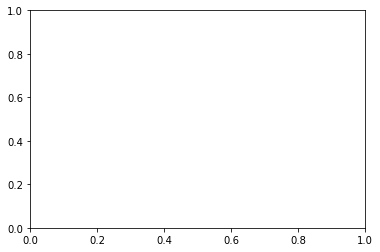

In [39]:


plot_decision_regions(X, y.astype(int), clf=best_model, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K={}'.format(k))
plt.show()

<h2>Other KNN approach</h2>

In [84]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.3107221  0.31509847 0.32236842 0.3377193  0.28508772]
cv_scores mean:0.31419920150485625


<h3>Hypertuning GridSearchCV</h3>

In [89]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=20)
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 18}
0.3842677345537757


<h3>Visualization</h3>